In [4]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [12]:
#Load and Explore the Dataset
#Handle Missing Values
#Remove Outliers
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_excel(r"E:\New folder\DS Incomplete Assignments\Clustering 2\EastWestAirlines.xlsx")

# Display the first few rows of the dataset
print(df.head())
print("Shape of dataset:", df.shape)
print("Columns in dataset:", df.columns)


# Impute missing values with the most frequent value for non-numeric columns
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Identify columns with object (string) dtype
object_cols = df_imputed.select_dtypes(include=['object']).columns

# Apply Label Encoding to convert strings to numeric
label_encoder = LabelEncoder()
for col in object_cols:
    # Convert the column to string type before applying LabelEncoder
    df_imputed[col] = label_encoder.fit_transform(df_imputed[col].astype(str))

# Apply Isolation Forest to detect outliers
iso_forest = IsolationForest(contamination=0.01)
df_imputed['outliers'] = iso_forest.fit_predict(df_imputed)

# Keep only the non-outlier data
df_no_outliers = df_imputed[df_imputed['outliers'] == 1].drop(columns='outliers')



  East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0  flying patterns, earning and use of frequent f...                                      
1  card.  The task is to identify customer segmen...                                      
2                                                NaN                                      
3                                                NaN                                      
4  Source: Based upon real business data; company...                                      

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN  
Shape of dataset: (26, 5)
Columns in dataset: Index(['East-West Airlines is trying to learn more about its customers.  Key issues are their',
       'Unnamed: 1', 'U

C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [13]:
# Scale the Features
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_no_outliers), columns=df_no_outliers.columns)

# Display the scaled data
print(df_scaled.head())


   East-West Airlines is trying to learn more about its customers.  Key issues are their  \
0                                           1.877437                                       
1                                           1.204520                                       
2                                          -0.982458                                       
3                                          -0.982458                                       
4                                           1.036291                                       

   Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  
0    0.369274   -0.294884   -0.369274   -0.995646  
1    0.369274   -0.294884   -0.369274   -0.995646  
2    0.369274   -0.294884   -0.369274   -0.995646  
3    0.369274   -0.294884   -0.369274   -0.995646  
4    0.369274   -0.294884   -0.369274   -0.995646  


       East-West Airlines is trying to learn more about its customers.  Key issues are their  \
count                                       2.500000e+01                                       
mean                                        4.440892e-18                                       
std                                         1.020621e+00                                       
min                                        -9.824580e-01                                       
25%                                        -9.824580e-01                                       
50%                                        -3.095416e-01                                       
75%                                         8.680622e-01                                       
max                                         1.877437e+00                                       

         Unnamed: 1    Unnamed: 2    Unnamed: 3    Unnamed: 4  
count  2.500000e+01  2.500000e+01  2.500000e+01  2.500000e+01  
mean  -

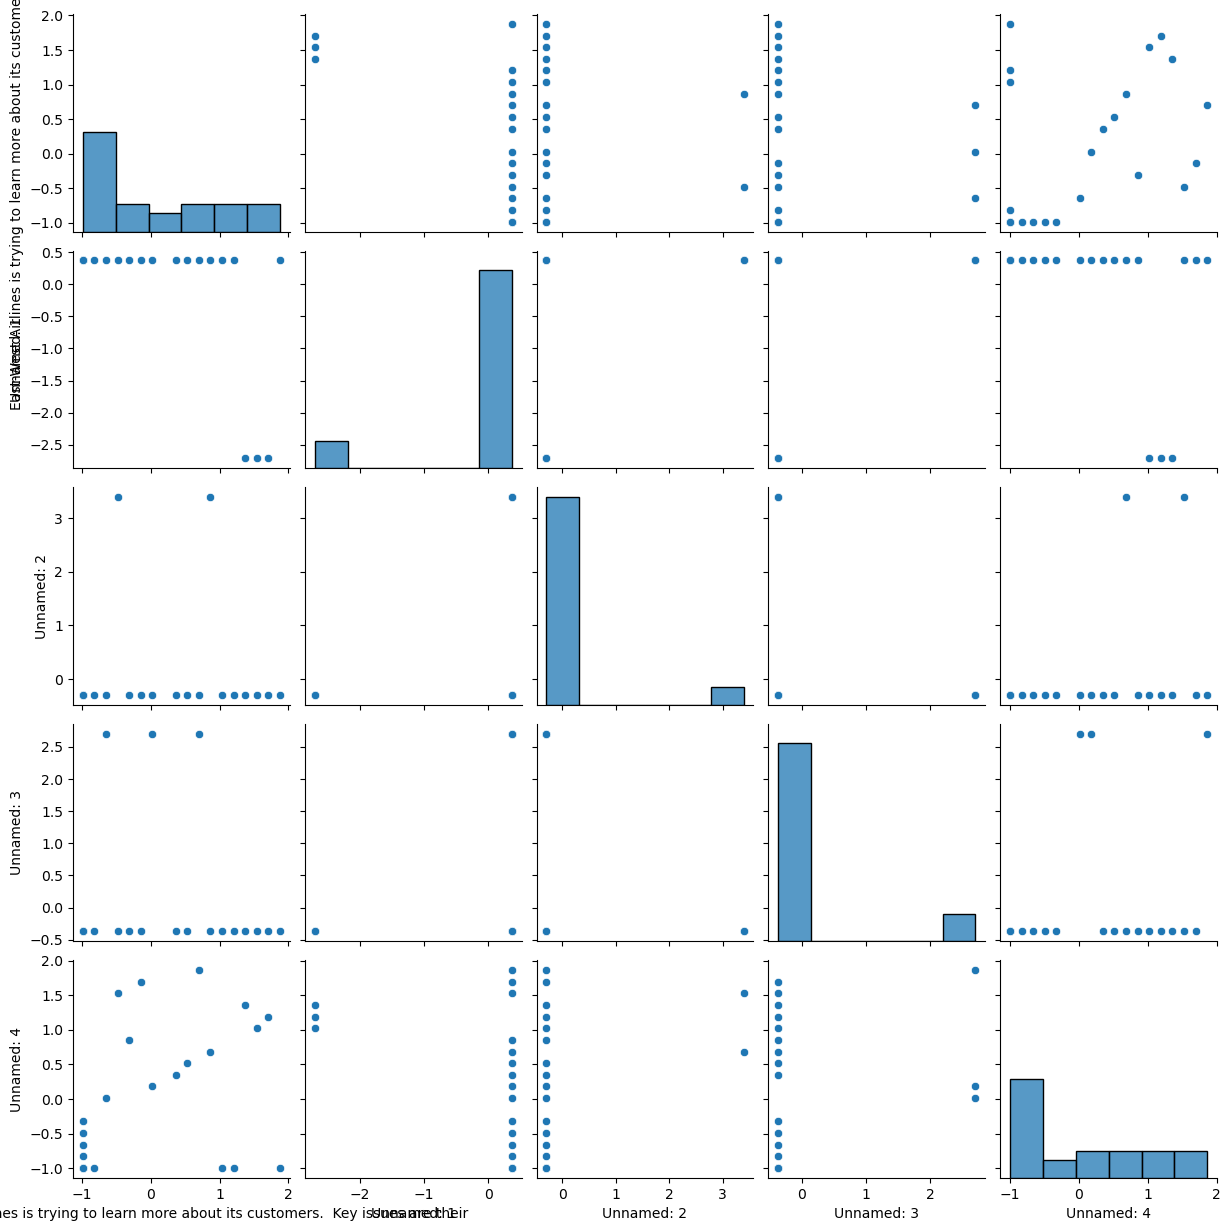

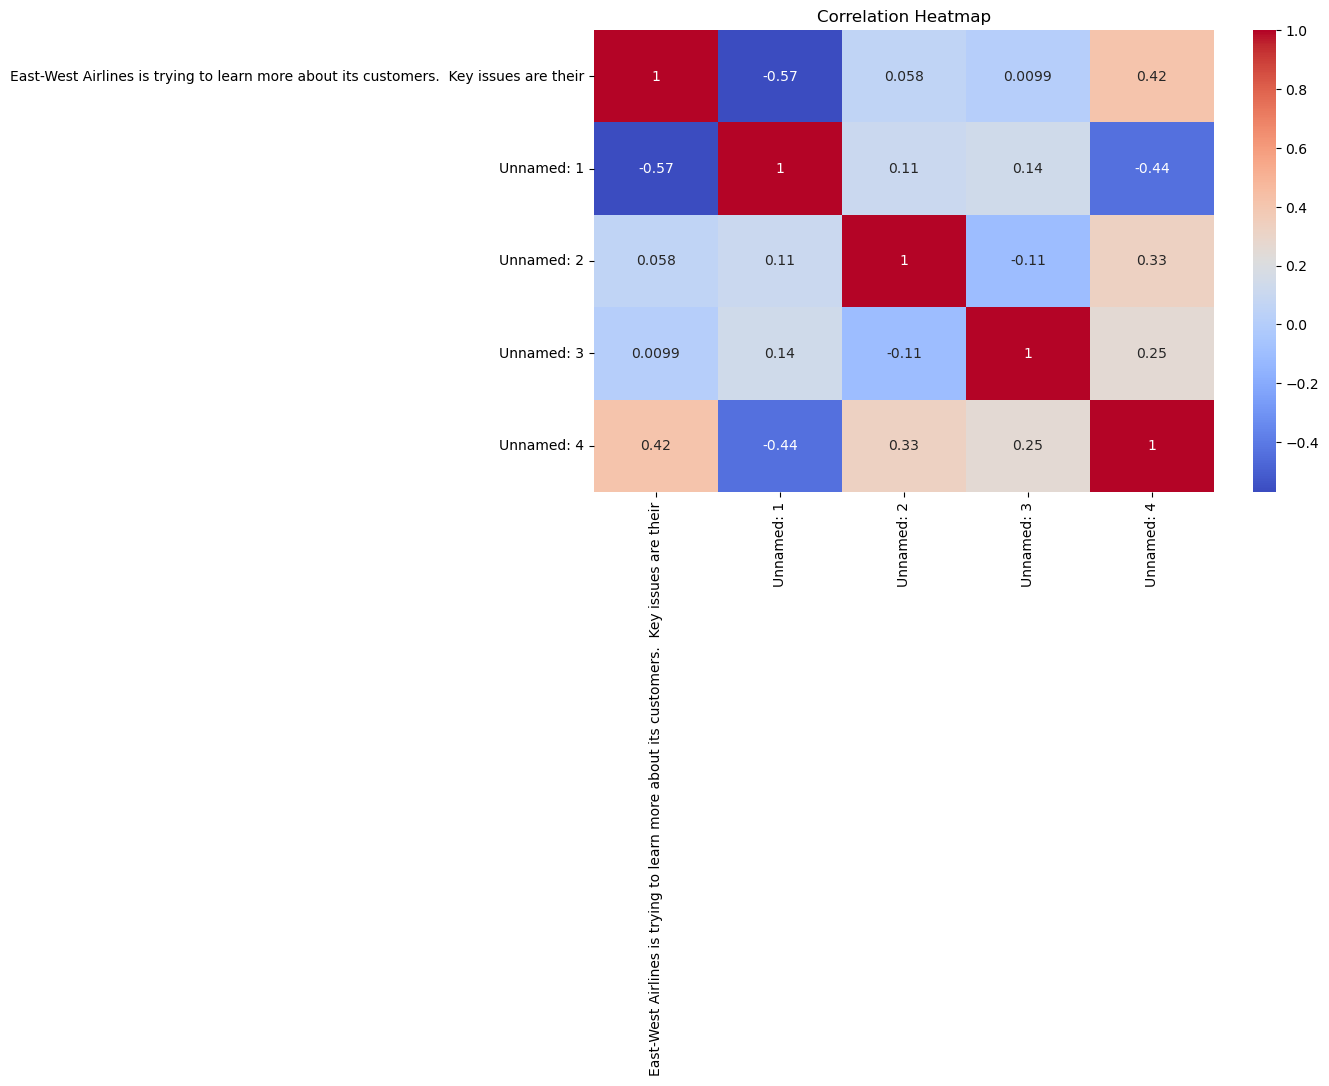

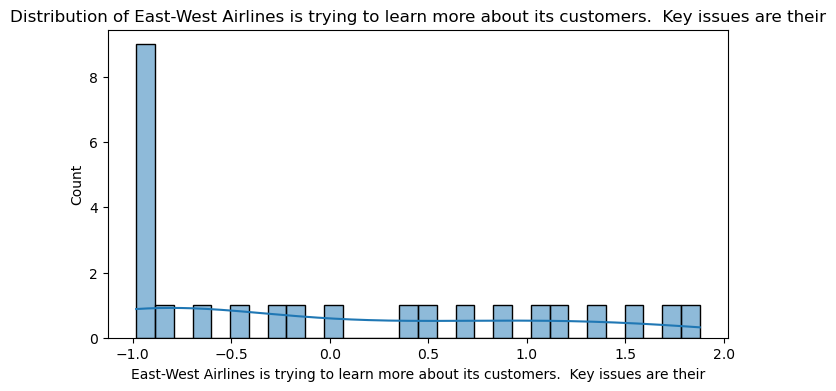

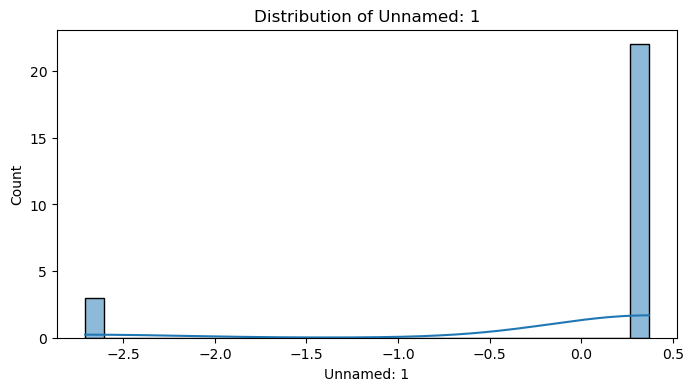

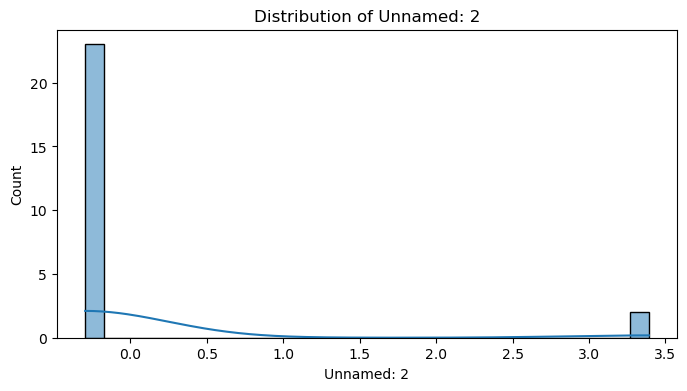

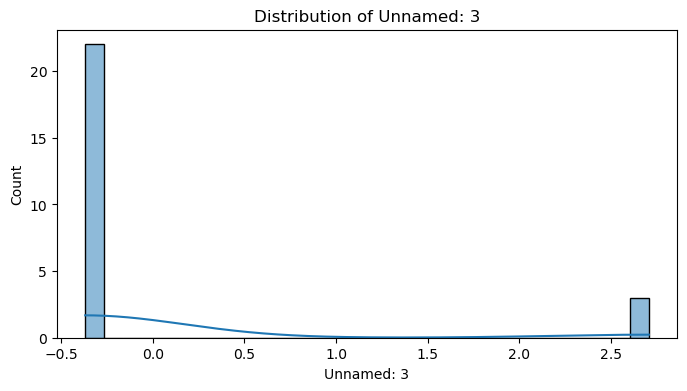

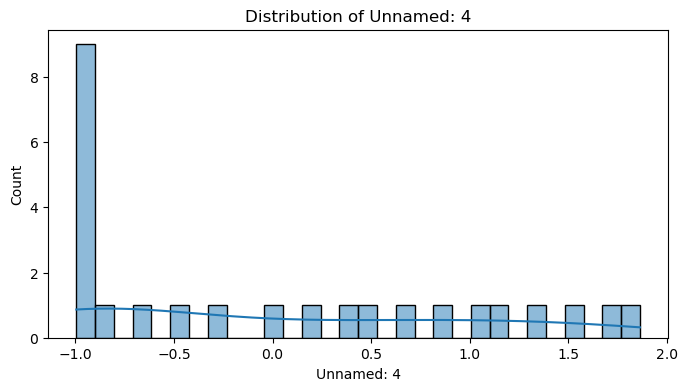

In [14]:
import numpy as np
# Basic statistics
print(df_scaled.describe())
import seaborn as sns
# Pairplot to visualize relationships
sns.pairplot(df_scaled)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution plots for each feature
for column in df_scaled.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_scaled[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

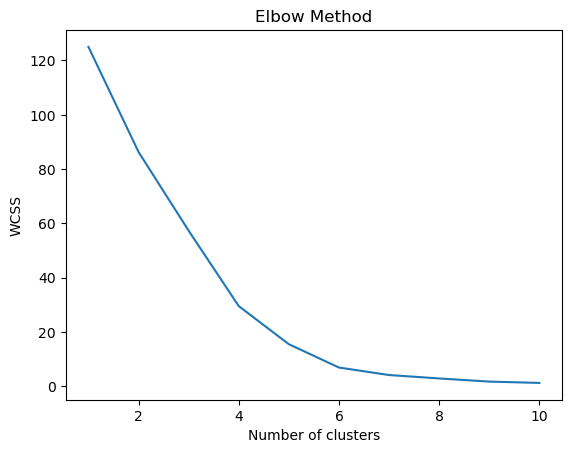

C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   kmeans_cluster
0               0
1               0
2               0
3               0
4               0


In [15]:
#k-Means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters (e.g., 3) based on the elbow method
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_scaled['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

# Display the resulting clusters
print(df_scaled[['kmeans_cluster']].head())


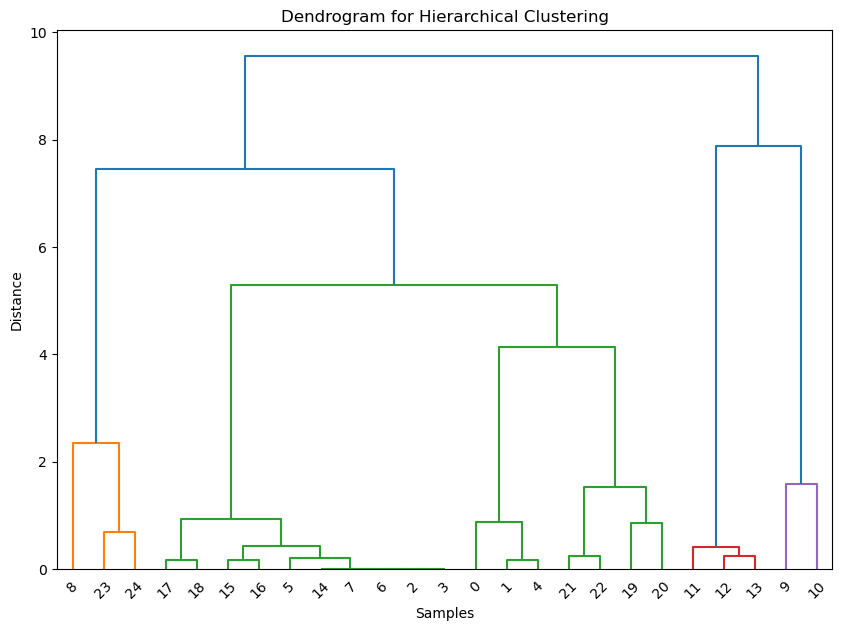

In [16]:
#Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Perform hierarchical clustering
linked = linkage(df_scaled, method='ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [17]:
#DBSCAN Clustering
from sklearn.cluster import DBSCAN

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_scaled['dbscan_cluster'] = dbscan.fit_predict(df_scaled)

# Display the resulting clusters
print(df_scaled[['dbscan_cluster']].head())


   dbscan_cluster
0              -1
1              -1
2               0
3               0
4              -1


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

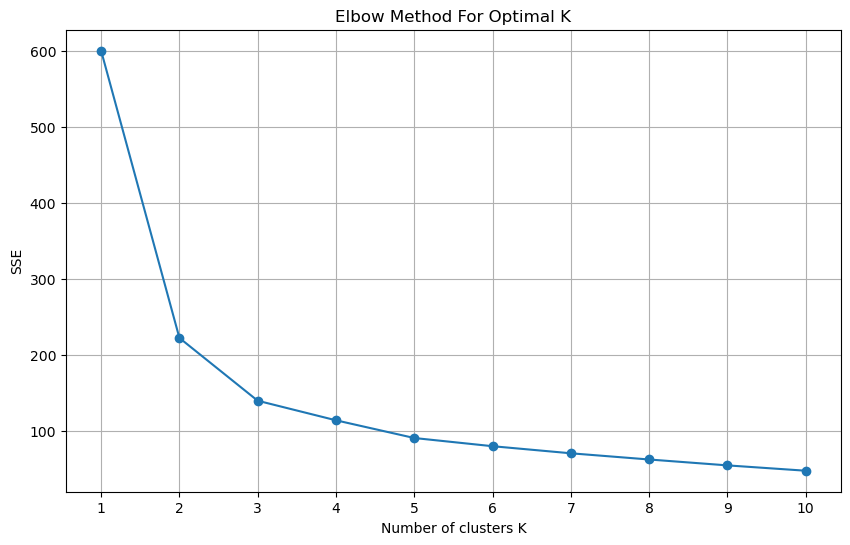

C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


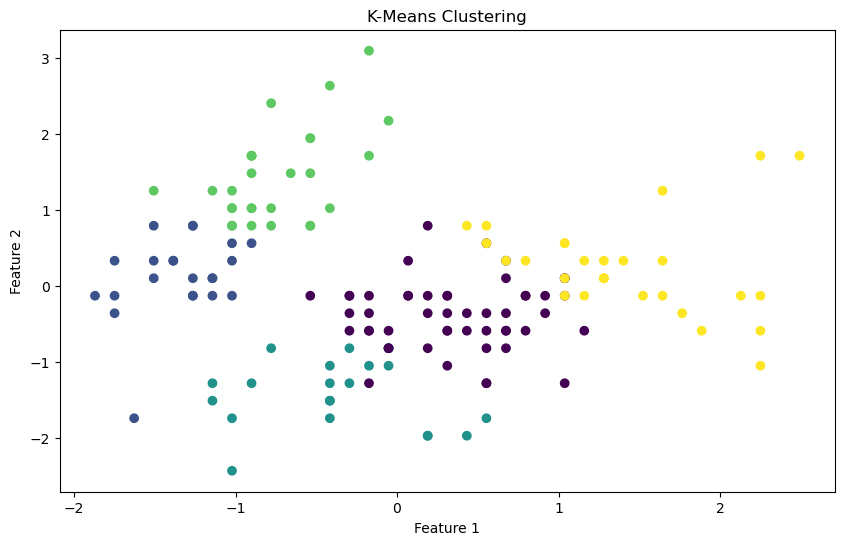

Silhouette Score for K-Means: 0.349


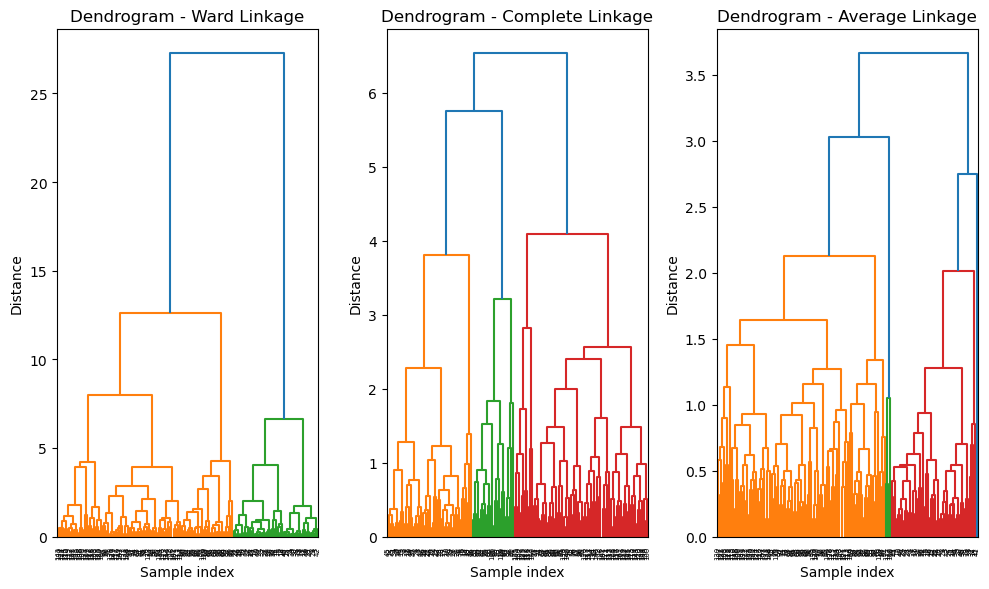

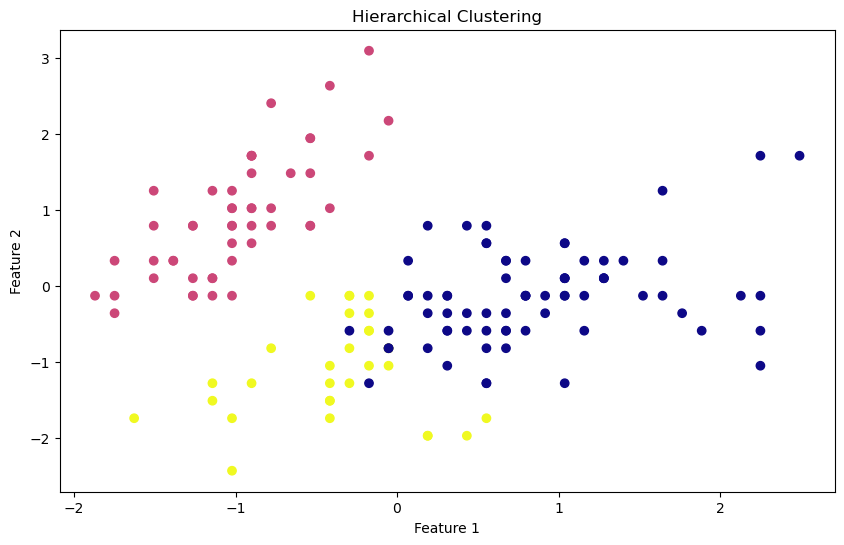

Silhouette Score for Hierarchical Clustering: 0.447


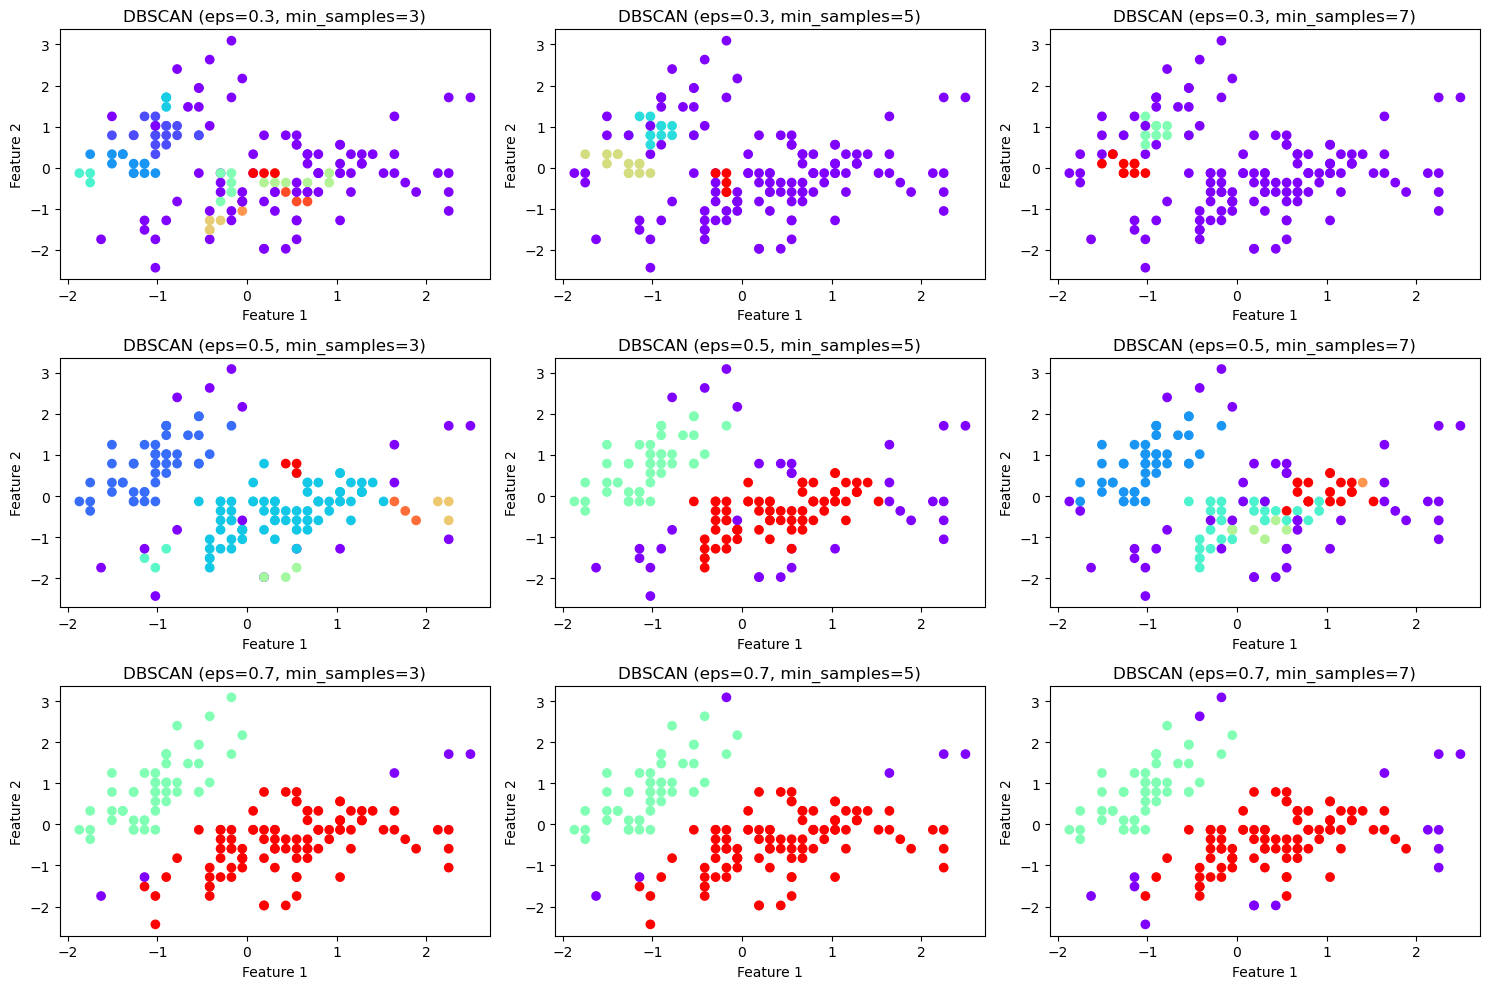

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris  # Example dataset
# Load the dataset (using the Iris dataset as an example)
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Check for missing values
print(df.isnull().sum())

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
# Elbow method
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters K')
plt.ylabel('SSE')
plt.xticks(k_values)
plt.grid()
plt.show()
optimal_k = 3  # Replace with the optimal K found from the elbow method
kmeans = KMeans(n_clusters=5, n_init=10)  # Set n_init explicitly
df['kmeans_cluster'] = kmeans.fit_predict(scaled_data)

# Visualizing K-Means Clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df['kmeans_cluster'], cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Evaluate clustering
silhouette_kmeans = silhouette_score(scaled_data, df['kmeans_cluster'])
print(f'Silhouette Score for K-Means: {silhouette_kmeans:.3f}')
# Hierarchical clustering
linkage_methods = ['ward', 'complete', 'average']
plt.figure(figsize=(10, 6))

for method in linkage_methods:
    linked = linkage(scaled_data, method)
    plt.subplot(1, len(linkage_methods), linkage_methods.index(method) + 1)
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()
# Applying hierarchical clustering with 'ward' linkage
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
df['hierarchical_cluster'] = hierarchical.fit_predict(scaled_data)

# Visualizing Hierarchical Clustering
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df['hierarchical_cluster'], cmap='plasma', marker='o')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Evaluate clustering
silhouette_hierarchical = silhouette_score(scaled_data, df['hierarchical_cluster'])
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:.3f}')
# DBSCAN with different parameters
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 7]

plt.figure(figsize=(15, 10))
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df['dbscan_cluster'] = dbscan.fit_predict(scaled_data)

        plt.subplot(len(eps_values), len(min_samples_values), i * len(min_samples_values) + j + 1)
        plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df['dbscan_cluster'], cmap='rainbow', marker='o')
        plt.title(f'DBSCAN (eps={eps}, min_samples={min_samples})')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means Cluster Characteristics:
                 sepal length (cm)  sepal width (cm)  petal length (cm)  \
kmeans_cluster                                                           
0                        5.225000          3.678571           1.475000   
1                        5.731111          2.642222           4.280000   
2                        6.644231          3.021154           5.361538   
3                        4.727273          3.109091           1.445455   
4                        7.600000          3.733333           6.400000   

                petal width (cm)   species  hierarchical_cluster  \
kmeans_cluster                                                     
0                       0.271429  0.000000              1.000000   
1                       1.355556  1.177778              1.288889   
2                       1.921154  1.750000              0.000000   
3                       0.213636  0.000000              1.045455   
4                       2.233333  2.000

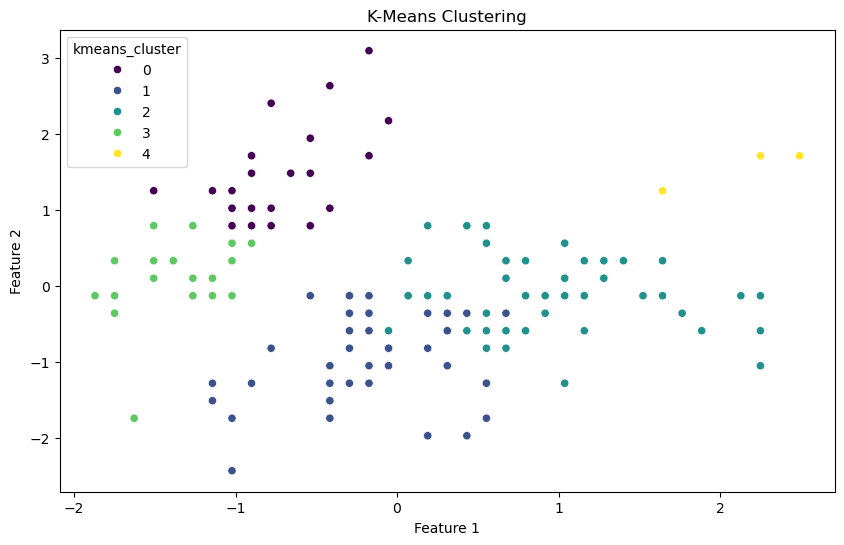

Hierarchical Cluster Characteristics:
                       sepal length (cm)  sepal width (cm)  petal length (cm)  \
hierarchical_cluster                                                           
0                              6.546479          2.992958           5.267606   
1                              5.016327          3.451020           1.465306   
2                              5.530000          2.566667           3.930000   

                      petal width (cm)   species  kmeans_cluster  \
hierarchical_cluster                                               
0                             1.854930  1.676056        1.859155   
1                             0.244898  0.000000        1.285714   
2                             1.206667  1.033333        1.066667   

                      dbscan_cluster  
hierarchical_cluster                  
0                           0.464789  
1                          -0.081633  
2                           0.266667  


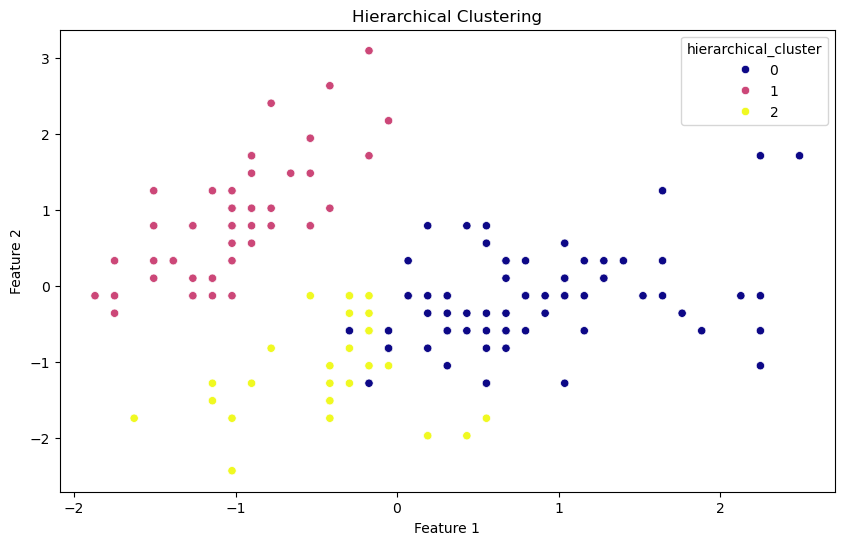

DBSCAN Cluster Characteristics:
                 sepal length (cm)  sepal width (cm)  petal length (cm)  \
dbscan_cluster                                                           
0                        4.968889          3.386667           1.471111   
1                        6.184507          2.884507           4.781690   

                petal width (cm)   species  kmeans_cluster  \
dbscan_cluster                                               
0                       0.246667  0.000000        1.400000   
1                       1.640845  1.450704        1.521127   

                hierarchical_cluster  
dbscan_cluster                        
0                           1.000000  
1                           0.535211  


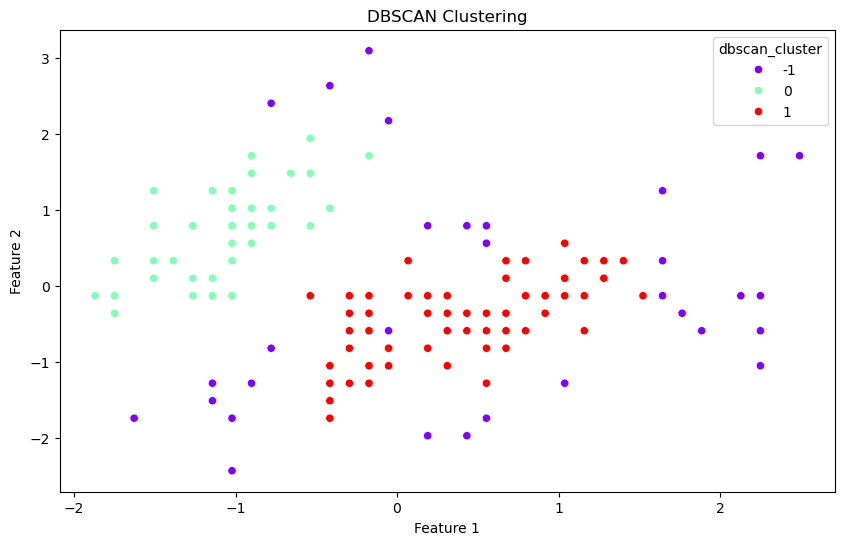

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target  # Add species for comparison

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])

# Apply K-Means
optimal_k = 3  # Based on previous analysis
kmeans = KMeans(n_clusters=5, n_init='auto')  # Use the new default
df['kmeans_cluster'] = kmeans.fit_predict(scaled_data)

# Hierarchical clustering
linked = linkage(scaled_data, 'ward')
hierarchical_clusters = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
df['hierarchical_cluster'] = hierarchical_clusters.fit_predict(scaled_data)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(scaled_data)
# K-Means Cluster Characteristics
kmeans_summary = df.groupby('kmeans_cluster').mean()
print("K-Means Cluster Characteristics:\n", kmeans_summary)

# Visualize K-Means Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=df['kmeans_cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Hierarchical Cluster Characteristics
hierarchical_summary = df.groupby('hierarchical_cluster').mean()
print("Hierarchical Cluster Characteristics:\n", hierarchical_summary)

# Visualize Hierarchical Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=df['hierarchical_cluster'], palette='plasma')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# DBSCAN Cluster Characteristics
dbscan_summary = df[df['dbscan_cluster'] != -1].groupby('dbscan_cluster').mean()  # Exclude noise
print("DBSCAN Cluster Characteristics:\n", dbscan_summary)

# Visualize DBSCAN Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=df['dbscan_cluster'], palette='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


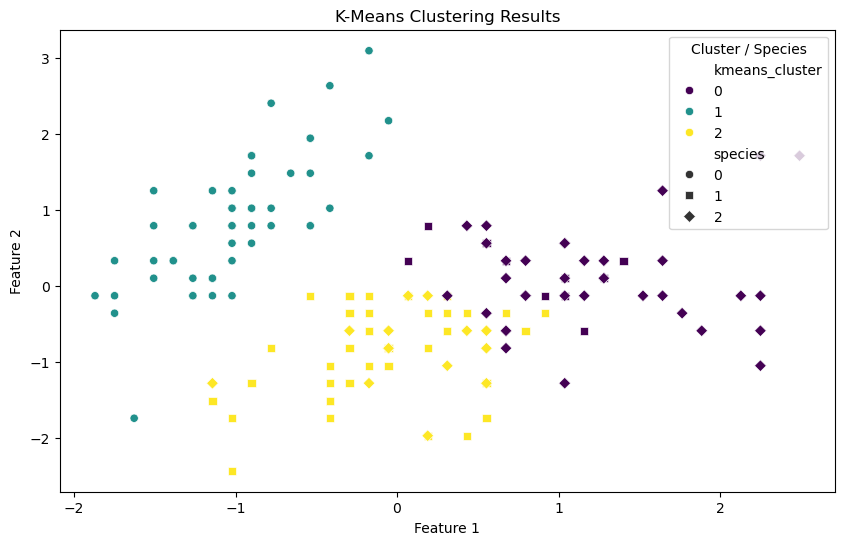

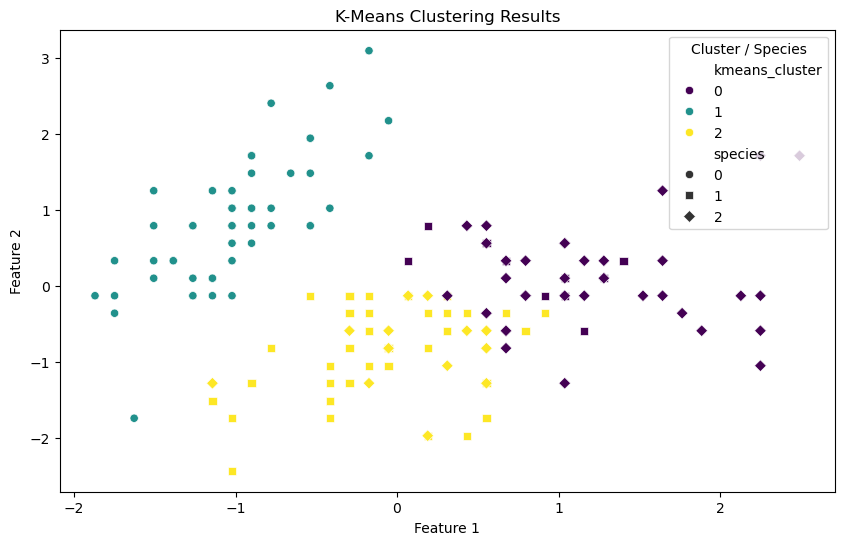

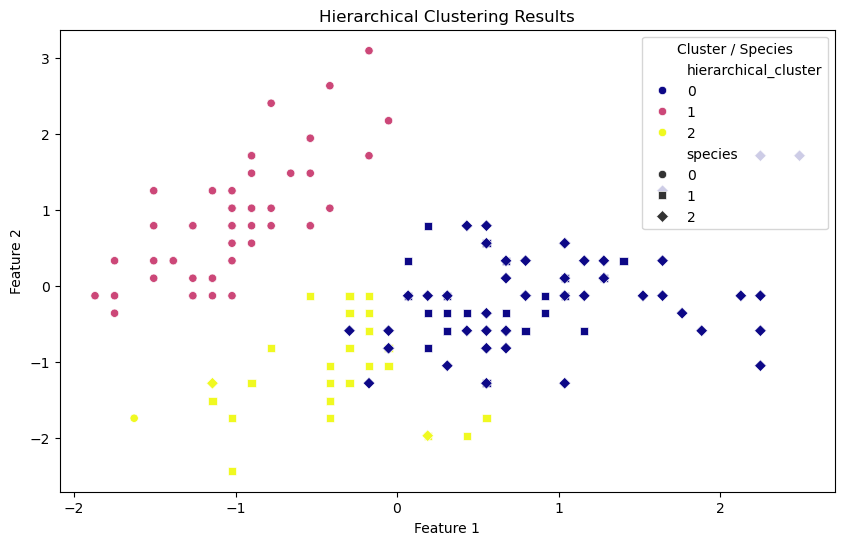

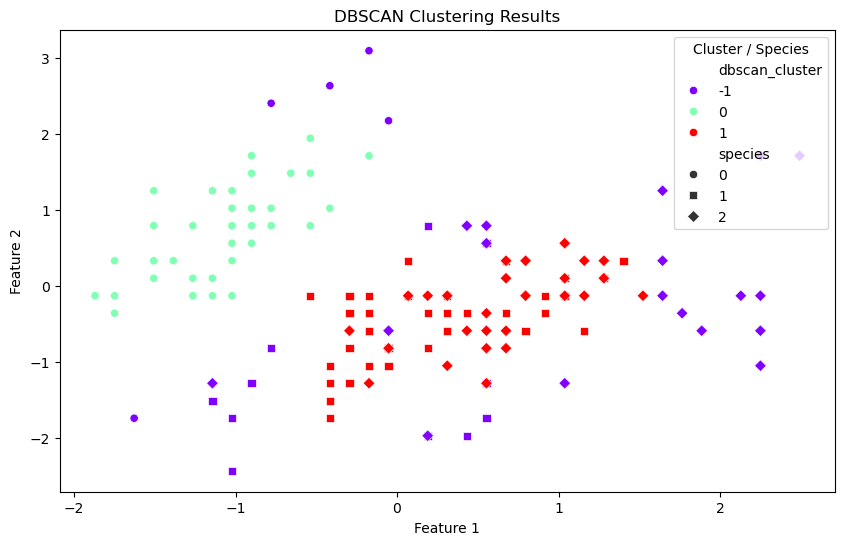

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target  # Add species for comparison

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])

# Apply K-Means
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(scaled_data)

# Hierarchical clustering
linked = linkage(scaled_data, 'ward')
from sklearn.cluster import AgglomerativeClustering
hierarchical_clusters = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
df['hierarchical_cluster'] = hierarchical_clusters.fit_predict(scaled_data)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=df['kmeans_cluster'], palette='viridis', style=df['species'], markers=["o", "s", "D"])
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster / Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=df['kmeans_cluster'], palette='viridis', style=df['species'], markers=["o", "s", "D"])
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster / Species')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=df['hierarchical_cluster'], palette='plasma', style=df['species'], markers=["o", "s", "D"])
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster / Species')
plt.show()

plt.figure(figsize=(10, 6))
# Use different color for noise points (-1)
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=df['dbscan_cluster'], palette='rainbow', style=df['species'], markers=["o", "s", "D"])
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster / Species')
plt.show()


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target  # Add species for comparison

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])

# Apply K-Means with explicit n_init
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)  # Set n_init explicitly
df['kmeans_cluster'] = kmeans.fit_predict(scaled_data)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(scaled_data)

# Calculate the silhouette score for K-Means
silhouette_kmeans = silhouette_score(scaled_data, df['kmeans_cluster'])
print(f'Silhouette Score for K-Means: {silhouette_kmeans:.3f}')

# Calculate the silhouette score for DBSCAN
if len(df[df['dbscan_cluster'] != -1]) > 0:  # Ensure there are valid clusters
    silhouette_dbscan = silhouette_score(scaled_data[df['dbscan_cluster'] != -1], df['dbscan_cluster'][df['dbscan_cluster'] != -1])
    print(f'Silhouette Score for DBSCAN: {silhouette_dbscan:.3f}')
else:
    print('No valid clusters found for DBSCAN.')


C:\Users\sathv\anaconda3\folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score for K-Means: 0.460
Silhouette Score for DBSCAN: 0.656
